### ANN Regression
model to predict the revenue collection of a movie based on factors such as budget, genre, actor rating etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
data_x = pd.read_csv("Movie_collection_Independent_data.csv")
data_y = pd.read_csv("Movie_collection_Target_data.csv")

In [3]:
data_x.shape

(506, 19)

In [4]:
data_y.shape

(506, 1)

In [5]:
data_x.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [6]:
data_y.head()

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


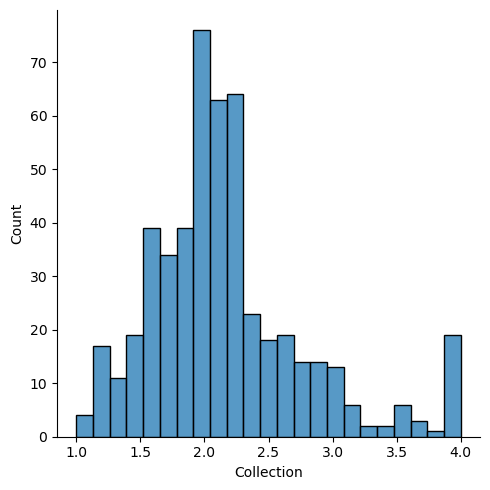

In [19]:
import seaborn as sns
sns.displot(data_y.Collection)

In [7]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(data_x, data_y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, random_state=42)

In [8]:
print(x_train.shape,"\n",x_val.shape,"\n",x_test.shape)

(284, 19) 
 (95, 19) 
 (127, 19)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [ ]:
#del model
#keras.backend.clear_session()

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape = x_train.shape[1:]))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

In [12]:
model.compile(optimizer = SGD(learning_rate = 1e-2),
             loss = "mean_squared_error",
             metrics = ['mae'])

In [13]:
checkpoint_cb = ModelCheckpoint("Movie_Revenue_Model.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

In [15]:
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
9/9 [==============================] - 1s 31ms/step - loss: 3.0214 - mae: 1.4665 - val_loss: 1.2818 - val_mae: 0.8793
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 0.6458 - mae: 0.5957 - val_loss: 0.6918 - val_mae: 0.6518
Epoch 3/100
1/9 [==>...........................] - ETA: 0s - loss: 0.7461 - mae: 0.6956

C:\Users\geetika singh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 11ms/step - loss: 0.4134 - mae: 0.4960 - val_loss: 0.4817 - val_mae: 0.5449
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3010 - mae: 0.4305 - val_loss: 0.3699 - val_mae: 0.4765
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2358 - mae: 0.3801 - val_loss: 0.3006 - val_mae: 0.4242
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1973 - mae: 0.3473 - val_loss: 0.2615 - val_mae: 0.3890
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1760 - mae: 0.3279 - val_loss: 0.2367 - val_mae: 0.3650
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 0.1584 - mae: 0.3117 - val_loss: 0.2276 - val_mae: 0.3587
Epoch 9/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1474 - mae: 0.3028 - val_loss: 0.2222 - val_mae: 0.3554
Epoch 10/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1379 - mae: 0.2944 - val_loss: 0.2

9/9 [==============================] - 0s 7ms/step - loss: 0.0543 - mae: 0.1742 - val_loss: 0.1568 - val_mae: 0.2919
Epoch 67/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0535 - mae: 0.1735 - val_loss: 0.1570 - val_mae: 0.2923
Epoch 68/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0534 - mae: 0.1729 - val_loss: 0.1568 - val_mae: 0.2923
Epoch 69/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0528 - mae: 0.1713 - val_loss: 0.1559 - val_mae: 0.2908
Epoch 70/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0522 - mae: 0.1703 - val_loss: 0.1561 - val_mae: 0.2914
Epoch 71/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0519 - mae: 0.1708 - val_loss: 0.1564 - val_mae: 0.2922
Epoch 72/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0516 - mae: 0.1687 - val_loss: 0.1556 - val_mae: 0.2906
Epoch 73/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0509 - mae: 0.1679 - val_loss

In [16]:
model = load_model("Movie_Revenue_Model.h5")
mse_test = model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.4167 - mae: 0.4439


In [17]:
y_pred = model.predict(x_test[:5])
y_pred

1/1 [==============================] - 0s 89ms/step


array([[2.7153692],
       [2.7878022],
       [1.6116818],
       [2.428001 ],
       [1.8697668]], dtype=float32)

In [18]:
y_test[:5]

,Collection
173,2.240000
274,2.826667
491,1.573333
72,2.186667
452,1.740000
